# **Projeto 1 - Dados Tabulares**

1.   Item da lista
2.   Item da lista



Trabalho realizado na disciplina de Ciência e Visualização de Dados em Saúde

Data: 13/04/2022 

## Equipe
Bruna Almeida Osti - RA 231024

Fábio Fogliarini Brolesi - RA 023718

Ingrid Alves de Paiva Barbosa - RA 182849 



# **1. Proposta**

Neste projeto, o objetivo é responder a pergunta de pesquisa apresentada pelo Prof. Dr. Erich Vinicius de Paula, Coordenador Geral do Hemocentro da Unicamp, baseado em dados laboratoriais do Hospital das Clínicas da Unicamp. 

A pergunta levantada é:

> Entre todos os pacientes do Hemocentro, quantos passaram pela condição da neutropenia febril?

Para isso, foi disponibilizado para a turma arquivos do tipo ".csv" com os dados, que possuem características reais. Foram preservados, todos os erros e falhas dos processos de coleta originais, bem como dos erros inseridos pela manipulação inadequada dos dados. A natureza biológica dos dados também foi preservada, assim como o nome dos procedimentos e suas características. As datas e nomes dos pacientes foram alteradas para evitar a identificação destes indíviduos. 

Este trabalho deve:

* Apresentar claramente quais são as perguntas de pesquisa tratadas pelo seu projeto.
* Apresentar os pressupostos assumidos.
* Descrição do conjunto de dados utilizado.
* Nesse projeto, é obrigatório que seu relatório tenha uma seção associada à análise exploratória dos dados com estatísticas descritivas e gráficos capazes de descrever os dados adequadamente.
* Descrição das etapas de pré-processamento e transformações necessárias, justificando suas escolhas (Ao invés de dizer que você fez um "drop de linhas nulas"  explique que seus dados tinham "n" linhas que não estavam preenchidas e que sua estratégia foi remover essas linhas.)
* Descrição da abordagem estatística escolhida para responder as perguntas de pesquisa.
* Apresentação e discussão dos resultados.
* Relato das limitações da abordagem adotada e principais dificuldades encontradas.

# **2. Modelo de referência** 

Para este trabalho foi adotado o modelo de referência CRISP-DM (CRoss-Industry Standard Process for Data Mining), criado pela SPSS Inc [1]. Este modelo é composto de 6 fases, e suas interações podem ser vistas na figura a seguir [1]: 

1. Entendimento do negócio/contexto
2. Entendimento dos dados
3. Preparação dos dados
4. Modelagem
5. Avaliação
6. Aplicação (*Deployment*)

![picture](https://drive.google.com/uc?export=view&id=1gp15oPSlA8ex9vob8getkOlzhnuorJjF)

Fig.1 - Modelo de referência CRISP-DM.

A seguir será explicado o objetivo de cada fase, com sua respectiva aplicação para solucionar o problema proposto neste projeto.

# **3. Entendimento do negócio**

Esta fase visa compreeder os objetivos e requisitos do projeto a partir de uma perspectiva de negócios ou do contexto em que se aplica, para que posteriormente seja possível converter esse conhecimento em um problema de mineração de dados e na criação de um plano para atingir os objetivos. Por essa razão abaixo serão apresentados alguns conceitos que auxiliam na compreensão do contexto envolvido. 

## 3.1 Câncer Hematológico

O câncer é um tipo de doença que pode surgir em qualquer parte do corpo, sendo que alguns órgãos são mais afetados do que outros. Cada órgão pode ser acometido por tipos diferenciados de tumor, mais ou menos agressivos [2]. E um dos tipos de câncer é a Leucemia.

A leucemia é uma doença maligna dos glóbulos brancos, geralmente, de origem desconhecida. Tem como principal característica o acúmulo de células doentes na medula óssea, que substituem as células sanguíneas normais. Na leucemia, uma célula sanguínea que ainda não atingiu a maturidade sofre uma mutação genética que a transforma em uma célula cancerosa. Essa célula anormal não funciona de forma adequada, multiplica-se mais rápido e morre menos do que as células normais. Dessa forma, as células sanguíneas saudáveis da medula óssea vão sendo substituídas por células anormais cancerosas [3]. 

Existem mais de 12 tipos de leucemia e a estimativa de novos casos em 2020 foi de 10.810, sendo 5.920 homens e 4.890 mulheres. Já o número de mortes em 2019 foi de 7.370, sendo 4.014 homens e 3.356 mulheres [4]. 

De forma geral, o processo de tratamento da leucemia envolve quimioterapia, controle das complicações infecciosas e hemorrágicas e prevenção ou combate da doença no Sistema Nervoso Central (cérebro e medula espinhal). Para alguns casos, é indicado o transplante de medula óssea [3].

O processo de quimioterapia causa muitas complicações ao paciente, e por isso, há muitas pesquisas na área da saúde que visam entender e reduzir estas complicações para que o paciente tenha a melhor recuperação possível. São estudados, por exemplo, quais fatores predispõe a maiores riscos, quais mecanismos levam ao aumento destes riscos, entre outros.

## 3.2 Hemocentro da Unicamp

A Unicamp possuí um centro de Hematologia e Hemoterapia, chamado de Hemocentro da Unicamp. Ele surgiu em 1985 e atua como Centro de Referência em nível terciário e quaternário para a região de Campinas nas áreas de Hematologia e Hemoterapia, atendendo a uma população de aproximadamente 6 milhões de habitantes distribuídos em cerca de 120 municípios. As atividades assistenciais do Hemocentro são realizadas duas Divisões Administrativas, a Hematologia e Hemoterapia [5]. 

A Divisão de Hematologia presta assistência médico-hematológica aos pacientes da região, através de atendimento ambulatorial (média de 80 pacientes/dia), hospitalar (18 leitos no Hospital de Clínicas da UNICAMP), quimioterápico (200 procedimentos/mês), odontológico e laboratorial especializados. Além de atenderem os portadores de doenças hematológicas malignas e benignas, os médicos também participam do ensino e pesquisas envolvendo muitas destas doenças, além de contribuírem de forma intensa para a definição de consensos e diretrizes sobre como estas doenças devem ser tratadas em todo o Brasil [5].


## 3.3 Trabalho de pesquisa

Sabendo que o tratamento de câncer hematológico é baseado em diagnóstico, quimioterapia e acompanhamento, vários trabalhos de pesquisa são feitos para permitir que o tratamento seja o menos complicado possível para o paciente. Um destes trabalhos visa identificar quem são os paciêntes que sofrem da condição de neutropenia febril, que está relacionada com a diminuição da contagem de neutrófilos, que são células do sistema imune.

Saber quem são os pacientes do Hemocentro que possuem está condição é uma primeira análise de dados que poderá auxiliar em outras análises futuras. Sendo assim, o objetivo deste trabalho é informar quem são os pacientes do Hemocentro que possuem essa condição da neutropenia febril.

Diante disso, a pergunta de negócio é:

> Identificar os pacientes que são pacientes do Hemocentro e que também fizeram exame laboratorial no Hospital das Clínicas, que possuem quantidade de neutrófilos inferior a 500. Informar também qual foi a primeira data onde esta observação ocorreu para cada um dos pacientes.


## 3.4 Pressupostos

De acordo com as informações passadas pelo professor Dr. Erich de Paula, que é o especialista, há alguns pressupostos que foram considerado:

* Sempre que a quantidade de neutrófilos for menor que 500 unidades/mm³ de sangue, pode ser considerado que o paciente está com neutropenia febril;
* É normal que haja valores iguais a zero, então estes não devem ser desconsiderados. 
* Sabe-se que se estes valores estão entre 1.000 e 1.800 unidades/mm³ de sangue pode-se considerar um início de recuperação da normalidade, já que os valores de referência são de 1.500 a 8.000 unidades/mm³ de sangue.
* Há a possibilidade de um mesmo paciente ter ficado vários dias internados. Ou ainda, pode ser que um paciente tenha passado por mais de uma internação no Hemocentro. Em ambos os casos, ele pode ter feito vários exames onde os neutrófilos estavam abaixo de 500 unidades/mm³ de sangue. Deve-se considerar apenas a primeira vez que esta condição foi identificada.
* O identificador usado para o Hemocentro é o mesmo usado para o Hospital das Clínicas, sendo assim, é possível dizer que se referem ao mesmo indivíduo.



# **4. Entendimento dos dados**

Nesta fase, é feita a coleta de dados inicial e a primeira análise dos dados, identificando problemas de qualidade de dados, descubrindo os primeiros *insights* sobre os dados e/ou detectando subconjuntos interessantes para formar hipóteses.

## 4.1 Política dos dados

Os dados estão anonimizados, não sendo possível identificar quem são os indivíduos em questão, mas mesmo assim, eles não podem ser compartilhados de forma alguma com pessoas de fora da diciplina.
Para evitar vazamentos, a recomendação é que não sejam feitas cópias locais dos arquivos, e que todo o trabalho seja feito no próprio diretório do Google, em nuvem.

## 4.2 Coleta dos dados

Os dados foram coletados anteriormente a este trabalho, sendo que a equipe não participou da coleta. Os dados são resultados de exames laboratoriais de sangue, realizados no Hospital das Clínicas da Unicamp.

## 4.3 Diretório recebido

Antes de analisar o diretório recebido, é necessário  montar o Google Drive para ter acesso aos arquivos, conforme o código abaixo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para analisar os dados, serão necessárias algumas bibliotecas, por esse motivo, o código abaixo apresenta todas as importações:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.figsize"] = (20,3)
import numpy as np
import glob
from datetime import timedelta 
import seaborn as sns
# instalar o pywaffle
!pip install pywaffle -q
from pywaffle import Waffle

     |████████████████████████████████| 565 kB 4.3 MB/s 


A equipe recebeu um diretório com nome "raw", onde há 1 arquivo do tipo ".xls", que conta com os identificadores dos pacientes do Hemocentro. Neste relatório esse arquivo será chamado de "pacientes_hemocentro", e será importado conforme código a seguir:


In [ ]:
pacientes_hemocentro = pd.read_excel('/content/drive/MyDrive/P1/raw/registros.xlsx', index_col=0, header=None)


Além disso, estão presentes no diretório 12 arquivos do tipo ".csv", que contam com os resultados dos exames. Estes arquivos fazem parte da mesma base de dados, porém por conta do número de linhas, o sistema precisou exportá-los separadamente. Apesar disso, todos os arquivos possuem o mesmo número e tipo de colunas. É necessário que os arquivos sejam novamente agrupados,e para isso eles serão importados abaixo:

In [ ]:
path = '/content/drive/MyDrive/P1/raw/' # use your path
all_files = glob.glob(path + "/*.csv")
print("Quantidade de arquivos: {}".format(len(all_files)))
df = pd.DataFrame()
li = []
df_final = pd.DataFrame()

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    if(df.shape[1] == 7):
      del df[1]
      df.columns = range(df.shape[1])
    li.append(df)
for i in range(len(li)):
    li[i] = li[i].dropna(axis='columns', how='all')

Quantidade de arquivos: 12


## 4.4 Identificação dos dados

Para identificar as colunas e formato dos dados do arquivo de pacientes do hemocentro, pode-se analisar o resultado da execução do código abaixo, onde é possível perceber que este arquivo contém $869$ linhas e apenas $1$ coluna útil, com todos os identificadores dos pacientes que já passaram pelo Hemocentro até determinada data.

In [ ]:
id_pacientes_hemocentro = list(set(pacientes_hemocentro[2]))
len(id_pacientes_hemocentro)

869

Sendo assim, o total de pacientes únicos listados que são tratados no hemocentro é de $869$.

In [ ]:
pacientes_hemocentro.head() #apenas para melhor compreensão das colunas da planilha

1         2
0                
NaN NaN  24805838
NaN NaN  24805838
NaN NaN  25042818
NaN NaN  25042818
NaN NaN  24966510

A análise dos 12 arquivos com os resultados dos exames também foi feita conforme código a seguir, onde é possivel identificar $2941688$ linhas e $6$ colunas, sendo:

* Coluna 0: data e hora da coleta
* Coluna 1: idade do indivíduo
* Coluna 2: identificador do indivíduo
* Coluna 3: Sexo
* Coluna 4: Parâmetro coletado
* Coluna 5: Valor do parâmetro coletado

In [ ]:
frame = pd.concat(li)
frame.shape

(2941688, 6)

In [ ]:
# Pequeno trecho do dataframe para entendimento
frame.head()

0     1         2  3                 4       5
0  2021-10-24 00:33:00  19.0  20850235  F  PLAQUETAS SANGUE  316,00
1  2021-10-24 00:33:00  70.0  16084789  M  PLAQUETAS SANGUE  239,00
2  2021-10-24 00:33:00  62.0  25926519  F  PLAQUETAS SANGUE  166,00
3  2021-10-24 00:33:00  49.0  20209887  M  PLAQUETAS SANGUE  201,00
4  2021-10-24 00:33:00  50.0  25722538  M  PLAQUETAS SANGUE  319,00


## 4.5 Problemas identificados

Ao trabalhar com ciência de dados, é comum encontrar problemas e erros nos arquivos recebidos, que podem ter sido causados tanto por erro na coleta, ou algum problema ao gerar os arquivos eletrônicos, ou até mesmo no momento de extração dos dados das ferramentas. É necessário dar uma atenção especial para estes problemas, pois eles podem afetar o resultado final. Neste trabalho os erros identificados foram os seguintes:

1.  Há dados vazios na Coluna 5, que representa o valor do parâmetro coletado. Inclusíve, há ocorrências do Neutrófilo Absoluto, que é o principal valor de interesse, com valores vazios, e este erro pode atrapalhar a análise. Por isso, serão eliminadas todas as linhas onde há valor do parâmetro vazio. 

2. Há registros duplicados que podem atrapalhar a análise e por isso serão eliminados.

# **5. Preparação dos dados**

Nesta fase serão feitas todas as preparações necessárias com os dados brutos para construir o conjuto de dados finais, que realmente serão usados na modelagem. É comum que esta etapa seja refeita várias vezes porque novas necessidades vão surgindo ao longo do trabalho. 

Para saber se serão necessárias conversões, é preciso conhecer os tipos de dados presentes em cada coluna do arquivo, conforme realizado pelo código abaixo:

In [ ]:
frame.dtypes

0     object
1    float64
2      int64
3     object
4     object
5     object
dtype: object

## 5.1 Coluna 0: Data e Hora

A data foi informada com quatro dígitos para o ano, dois dígitos para o mês e dois dígitos para o dia, tendo a barra como separador ("/"), seguida pela hora com dois dígitos para hora, dois dígitos para os minutos e dois digítos para os segundos, tendo dois pontos (":") como separador, seguindo então o seguinte formato:

>AAAA/MM/DD HH:MM:SS

Conforme analisado no código acima, não há nenhuma data com valor nulo, então não há linhas a serem eliminadas por essa razão.

Como o código identificou a Coluna 0 sendo do tipo *object*, e na verdade ela é do tipo *timestamp*, foi necessário realizar a conversão, conforme código apresentado a seguir:

In [ ]:
frame[0] = pd.to_datetime(frame[0])



## 5.2 Coluna 1: Idade

A idade foi informada com dois dígitos numéricos. Foi necessário informar este formato para o código. Além disso, foi feito um filtro para buscar pelos prováveis erros:

* Valores acima de 117 anos podem ser considerados erros já que a pessoa mais velha do Brasil até janeiro de 2022 possuia 116 anos [6]. 
* Valores negativos não podem ser considerados no campo idade.

Foi verificado que nenhum dos dois casos tinham ocorrências na base de dados, sendo assim, nenhuma informação foi eliminada por essa razão.

Porém, foram identificados 5 linhas com a idade nula ou vazia (conforme apresentado anteriormente). Como a pergunta de pesquisa principal não considera a idade, estas linhas não foram removidas, para preservar os dados de interesse.

In [ ]:
frame[1] = frame[1].astype(float)

In [ ]:
erros_idade1 = frame[frame[1] > 117]
len(erros_idade1)

0

In [ ]:
erros_idade2 = frame[frame[1] < 0]
len(erros_idade2)

0


## 5.3 Coluna 2: Identificador do paciente

O identificador do paciente possuí 8 dígitos numéricos, então foi necessário informar este formato para o código. Nenhum campo vazio foi identificado, sendo assim, este campo não foi manipulado

In [ ]:
frame[2] = frame[2].astype(int)

## 5.4 Coluna 3: Sexo

Esta coluna apresentava dois resultados possíveis, sendo M para masculino e F para feminino. Não foram encontradas campos vazios para este parâmetro, mas foram encontrados $50$ campos com valores diferentes de M e F. Como o sexo não interfere na pergunta principal da pesquisa, estes dados foram mantidos, mesmo que incompletos. Se eles tivessem sido removidos, poderiamos perder alguns pacientes com netropenia febril.

In [ ]:
frame[3] = frame[3].astype("category")

In [ ]:
erros_sexo = frame[(frame[3] != "M") & (frame[3] != "F")]
len(erros_sexo)

50

## 5.5 Coluna 4: Parâmetro

Esta coluna conta com o nome do parâmetro que foi medido na amostra de sangue. É, portanto, uma variável String, que faz parte de uma lista finita de possibilidades, por isso precisa ser definida como varíavel do tipo *category*.

In [ ]:
frame[4] = frame[4].astype("category")

## 5.6 Coluna 5: Valor do parâmetro

Esta ultima coluna conta com o valor do parâmetro apresentado na coluna anterior. Para os neutrófilos, sabe-se que a unidade usual é quantidade por mm³, mas percebeu-se que todos os valores estavam muito abaixo do esperado. Diante disso, a equipe identificou que os dados estavam em outra unidade, 10³/uL. 

Por essa razão, ao invés de buscar por valores menores que 500, foi necessário buscar valores menor que 0,5, já que 500 neutrofilos/mm³ de sangue representam numéricamente 0,5 10³ neutrófilos/uL de sangue.

Além disso, para realizar as operações foi necessário substituir as vírgulas por pontos no separador de decimal, já que o python identifica desta forma.

In [ ]:
frame[5] = frame[5].str.strip()
frame[5] = frame[5].str.replace(',', '.')
frame[5] = pd.to_numeric(frame[5], errors="coerce")
#frame[5] = frame[5].astype(float)

In [ ]:
# Remoção dos registros duplicados
frame = frame.drop_duplicates().reset_index(drop=True)

Além disso, é importante saber se há dados nulos presentes no arquivo, por isso, é executado o comando abaixo:

In [ ]:
frame.isnull().sum()

0         0
1         5
2         0
3         0
4         0
5    105565
dtype: int64

O que interessa para a equipe aqui é o número absoluto de Neutrófilos, por isso foi necessário fazer um filtro para eliminar os outros parâmetros. Foram encontrados $252409$ dados com este parâmetro.

In [ ]:
dados_neutrofilos = frame[frame[4] == 'NEUTRÓFILOS ABSOLUTO']
len(dados_neutrofilos)

252409

In [ ]:
dados_neutrofilos.head()

0     1         2  3                     4       5
5 2021-10-24 00:33:00  19.0  20850235  F  NEUTRÓFILOS ABSOLUTO  9.9006
6 2021-10-24 00:33:00  70.0  16084789  M  NEUTRÓFILOS ABSOLUTO  2.3423
7 2021-10-24 00:33:00  50.0  25722538  M  NEUTRÓFILOS ABSOLUTO  7.3983
8 2021-10-24 00:33:00  49.0  20209887  M  NEUTRÓFILOS ABSOLUTO  3.2026
9 2021-10-24 00:33:00  62.0  25926519  F  NEUTRÓFILOS ABSOLUTO  9.2064

# **6. Modelagem**

Nesta fase, são aplicadas técnicas de modelagem para analisar os dados. É comum que seja necessário retornar à etapa de preparação dos dados, já que algumas técnicas tem requisitos específicos que não foram previstos antes.

Tendo todos os dados devidamente definidos, convertidos e pré-processados, é possível focar na modelagem para responder a pergunta de interesse. O grande objetivo é identificar os pacientes com neutropenia febril, que são aqueles que possuem o número absoluto de neutrófilos abaixo de 500. Para isso, é realizada a sequência de comandos abaixo:

In [ ]:
"Dados faltantes sobre neutrofilos: {}".format(dados_neutrofilos.loc[:,5].isnull().sum())

'Dados faltantes sobre neutrofilos: 1185'

Dentro do conjunto de registros com neutrófilos absolutos, temos  $1185$  dados que não tem registro numérico (são valores em branco).

In [ ]:
dados_neutrofilos_null = list(dados_neutrofilos[dados_neutrofilos.loc[:,5].isnull()].loc[:,2])

In [ ]:
id_pacientes_hc_interesse = dados_neutrofilos[dados_neutrofilos[5] < .5][2].drop_duplicates()

In [ ]:
len(id_pacientes_hc_interesse)

678

O total de pacientes únicos que realizaram exame no Hospital das Clínicas, onde o valor dos neutrófilos absolutos é menor do que  500, é de $678$.

Pacientes na base de dados do Hospital das Clínicas que estão sem os resultados de neutrofilia, e estão na base do hemocentro, serão removidos pois não temos informações suficientes sobre eles.

In [ ]:
"Pacientes do HC com informações faltantes de neutrofilia: {}".format(id_pacientes_hc_interesse.isin(dados_neutrofilos_null).sum())

'Pacientes do HC com informações faltantes de neutrofilia: 159'

In [ ]:
id_pacientes_hc_interesse = id_pacientes_hc_interesse[~id_pacientes_hc_interesse.isin(dados_neutrofilos_null)]

In [ ]:
"Total de pacientes do hc com neutrofilia: {}".format(len(id_pacientes_hc_interesse))

'Total de pacientes do hc com neutrofilia: 519'

Entretanto, a pergunta de pesquisa quer identificar apenas os pacientes com neutropenia febril que são também pacientes do Hemocentro, por isso será necessário conferir quais dos pacientes identificados acima constam na lista de registros do Hemocentro, conforme abaixo:

In [ ]:
id_pacientes_de_interesse = pd.DataFrame(np.intersect1d(id_pacientes_hemocentro, id_pacientes_hc_interesse))
len(id_pacientes_de_interesse)

297

A pergunta de pesquisa definida pede que seja informada apenas a primeira ocorrência de Neutrófilos Absoluto abaixo de 500 para cada paciente. Isso pode ser feito conforme abaixo:

In [ ]:
ocorrencias_neutrofilos = dados_neutrofilos[dados_neutrofilos[2].isin(list(id_pacientes_de_interesse[0]))]

In [ ]:
len(ocorrencias_neutrofilos)

8348

In [ ]:
ocorrencias_neutrofilos.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [ ]:
ocorrencias_neutrofilos = ocorrencias_neutrofilos.sort_values(by=[0], ascending=True)

In [ ]:
ocorrencias_neutrofilos = ocorrencias_neutrofilos[ocorrencias_neutrofilos[5] < .5]

In [ ]:
primeira_ocorrencia_pacientes = ocorrencias_neutrofilos.drop_duplicates(subset=[2], keep='first', inplace=False)

In [ ]:
primeira_ocorrencia_pacientes.head()

0     1         2  3                     4     5
1086798 2018-10-25 08:55:00  29.0  25060976  F  NEUTRÓFILOS ABSOLUTO  0.11
1086846 2018-10-25 09:13:00  46.0  23425873  F  NEUTRÓFILOS ABSOLUTO  0.02
1086847 2018-10-25 09:13:00  27.0  25042818  M  NEUTRÓFILOS ABSOLUTO  0.36
1086849 2018-10-25 09:13:00  60.0  14039975  F  NEUTRÓFILOS ABSOLUTO  0.04
1086890 2018-10-25 09:15:00  64.0  24764331  F  NEUTRÓFILOS ABSOLUTO  0.03

In [ ]:
primeira_ocorrencia_pacientes.to_csv('/content/drive/MyDrive/P1/raw/resultados/result.csv')

Diante disso, é possível afirmar que há $297$ pacientes do Hemocentro, que também realizaram exames no Hospital das Clínicas, com quantidade absoluta de neutrófilos abaixo de 500 por mm³, podendo serem considerados pacientes que sofrem da condição de Neutropenia Febril.

O arquivo "result.csv" gerado apresenta os identificadores destes pacientes, juntamente com a data e hora da primeira ocorrência identificada.

# **7. Avaliação e *Deployment***

Nestas últimas duas fase do projeto, é feita uma análise crítica do modelo construído, a fim de determinar se há alguma outra questão importante que não foi considerada da melhor forma possível. Ao final desta fase já há uma decisão quanto ao resultado das hipóteses levantadas.

A avaliação será baseada nos resultados das estatísticas descritivas que serão aparesentadas a seguir.

## 7.1 Estatísticas descritivas

Foram feitas análises baseadas nos dados estatísticos para conhecer melhor as características dos pacientes com neutropenia febril. O quadro abaixo apresenta uma descrição geral dos parâmetros numéricos, onde o interesse é pela idade (Coluna 1) e do Valor absoluto do Neutrófilo (Coluna 5).

In [ ]:
primeira_ocorrencia_pacientes.describe()

1             2           5
count  297.000000  2.970000e+02  297.000000
mean    52.360269  2.400263e+07    0.249388
std     18.219055  2.638816e+06    0.155098
min      1.000000  1.280507e+07    0.000000
25%     42.000000  2.361498e+07    0.110000
50%     56.000000  2.510604e+07    0.260000
75%     65.000000  2.551654e+07    0.391800
max     91.000000  2.597520e+07    0.497000

### 7.1.1 Idade

De acordo com a tabela anterior, é possível dizer que o paciente mais novo tinha apenas $1$ ano, e o mais velhor possuia $91$ anos. A média de idade dos pacientes com número absoluto de neutrófilos abaixo de 500 é de $52.36$ anos. Já o desvio padrão foi de $18.22$ anos.

In [ ]:
primeira_ocorrencia_pacientes[1].mean()

52.36026936026936

A mediana de idade dos pacientes com número absoluto de neutrófilos abaixo de 500 é de $56$ anos.

In [ ]:
primeira_ocorrencia_pacientes[1].median()

56.0

Já a moda de idade dos pacientes com número absoluto de neutrófilos abaixo de 500 é de $61$ anos.

In [ ]:
primeira_ocorrencia_pacientes[1].mode()

0    61.0
dtype: float64

### 7.1.2 Sexo

Entre todos os $297$ pacientes com número absoluto de neutrófilos abaixo de 500, $171$ são do gênero masculino e $126$ são do gênero feminino.

In [ ]:
homens = primeira_ocorrencia_pacientes[primeira_ocorrencia_pacientes[3] == 'M']
len(homens)

171

In [ ]:
mulheres = primeira_ocorrencia_pacientes[primeira_ocorrencia_pacientes[3] == 'F']
len(mulheres)

126

### 7.1.3 Estratificação por sexo

A fim de compreender se há alguma diferença no comportamento dos dados dos homens e mulheres, foi feita a estratificação e análise conforme abaixo. 

É possível perceber que a média de idade dos homens com neutropenia febril é de $54.6$ anos, enquanto a média das mulheres é de $49.31$.

In [ ]:
primeira_ocorrencia_pacientes[primeira_ocorrencia_pacientes[3] == 'M'].describe()

1             2           5
count  171.000000  1.710000e+02  171.000000
mean    54.602339  2.434616e+07    0.260156
std     16.839547  2.211539e+06    0.150680
min      1.000000  1.280507e+07    0.000000
25%     46.500000  2.450779e+07    0.140050
50%     58.000000  2.512230e+07    0.289400
75%     65.000000  2.553712e+07    0.390900
max     91.000000  2.596789e+07    0.497000

In [ ]:
primeira_ocorrencia_pacientes[primeira_ocorrencia_pacientes[3] == 'F'].describe()

1             2           5
count  126.000000  1.260000e+02  126.000000
mean    49.317460  2.353640e+07    0.234774
std     19.599857  3.075228e+06    0.160347
min      3.000000  1.371916e+07    0.000000
25%     32.250000  2.285847e+07    0.089200
50%     53.500000  2.506388e+07    0.229800
75%     63.000000  2.539684e+07    0.397525
max     91.000000  2.597520e+07    0.496600

### 7.1.4 Número de internações

Uma das perguntas de pesquisa levantadas para discussão na palestra do Dr. Erich de Paula era relacionada ao número de internações de cada paciente com neutropenia febril. Quando um mesmo paciente realiza várias exames, não sabe-se se estes ocorreram em uma mesma internação, ou em internações diferentes. Apesar de isto não ter sido solicitado para este trabalho, a equipe julgou uma informação importante, pois assim é possível compreender se houve melhora do paciente na mesma internação, ou ainda, se ele recebeu alta e depois precisou voltar a se internar por outras complicações.

Para isso, usou-se de estatícas descritívas para compreender o comportamento do número de dias de uma internação, e também para identificar após quantos dias sem realizar nenhum exame de rotina pode-se considerar que se trata de outra internação. Os resultados com o número de internações de cada paciente é salvo no formato ".csv", conforme abaixo.

In [ ]:
m = -1
idx = 0
max_inter = 0
max_qtd_inter_idx = 0
internacoes_df = pd.DataFrame(columns=['id', 'internacoes']) 
for idx_paciente_interesse in id_pacientes_de_interesse[0]:
  
  tmp_interesse = frame[(frame[2] == idx_paciente_interesse)]
  interesse = tmp_interesse[tmp_interesse[4] == 'NEUTRÓFILOS ABSOLUTO']

  df_interesse_internacoes = tmp_interesse[tmp_interesse[4] == 'NEUTRÓFILOS ABSOLUTO']
  df_interesse_internacoes = df_interesse_internacoes.sort_values(by=[0], axis=0)
  df_interesse_internacoes[7] = df_interesse_internacoes[0].shift(1)
  n_internacoes = ((df_interesse_internacoes[0] - df_interesse_internacoes[7]) > timedelta(days=7)).sum() + 1
  new_row = {'id': idx_paciente_interesse, 'internacoes': n_internacoes}
  internacoes_df = internacoes_df.append(new_row, ignore_index=True)
  max_internacoes = max(max_inter, n_internacoes)
  if n_internacoes == max_internacoes:
    max_inter = n_internacoes
    max_qtd_inter_idx = idx_paciente_interesse

  m = max(m, interesse.shape[0])
  if m == interesse.shape[0]:
    idx = idx_paciente_interesse

In [ ]:
internacoes_df

id internacoes
0    12805068           2
1    13719164           8
2    14039975           6
3    14760757           1
4    14940300           1
..        ...         ...
292  25912468           2
293  25920281           2
294  25952430           1
295  25967889           1
296  25975197           1

[297 rows x 2 columns]

In [ ]:
internacoes_df.to_csv('/content/drive/MyDrive/P1/raw/resultados/internacoes.csv')

## 7.2 Visualização dos dados

Visualizar os dados é etapa importante para compreendê-los, juntamente com as estatísticas geradas anteriormente.

### 7.2.1 Idade

Abaixo é apresentado o Histograma da idade dos pacientes com número absoluto de neutrófilos abaixo de 500, sem estratificar pelo gênero, a fim de compreender como a idade se distribui.

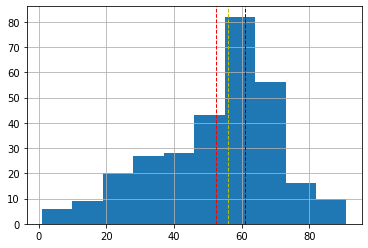

In [ ]:
primeira_ocorrencia_pacientes[1].hist()
plt.axvline(primeira_ocorrencia_pacientes[1].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(primeira_ocorrencia_pacientes[1].median(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(primeira_ocorrencia_pacientes[1].mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.show()

### 7.2.2 Sexo

Abaixo é mostrado um gráfico que apresenta uma visualização da quantidade de homens e mulheres com número absoluto de neutrófilos abaixo de 500.

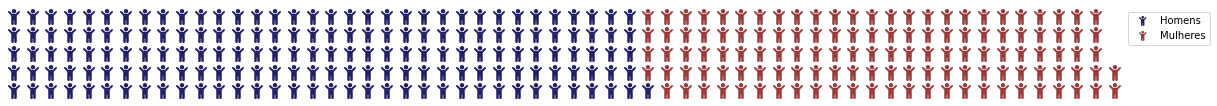

In [ ]:
fig = plt.figure(
    figsize = (20,20),
    FigureClass=Waffle, 
    rows=5, 
    values={'Homens': 171, 'Mulheres': 126}, 
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=16, 
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();

### 7.2.3 Estratificação por sexo

A distribuição da idade estratificada por sexo pode ser visualizada nos gráficos abaixo.

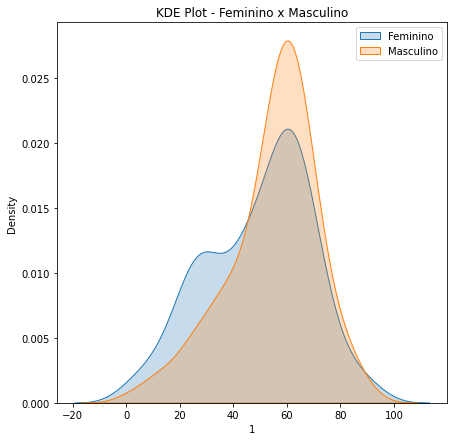

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
ax.set_title("KDE Plot - Feminino x Masculino")
sns.kdeplot(primeira_ocorrencia_pacientes[primeira_ocorrencia_pacientes[3] == 'F'][1],
            shade = True, ax = ax, label = "Feminino")
sns.kdeplot(primeira_ocorrencia_pacientes[primeira_ocorrencia_pacientes[3] == 'M'][1],
            shade = True, ax = ax, label = "Masculino")
ax.legend()

plt.show()

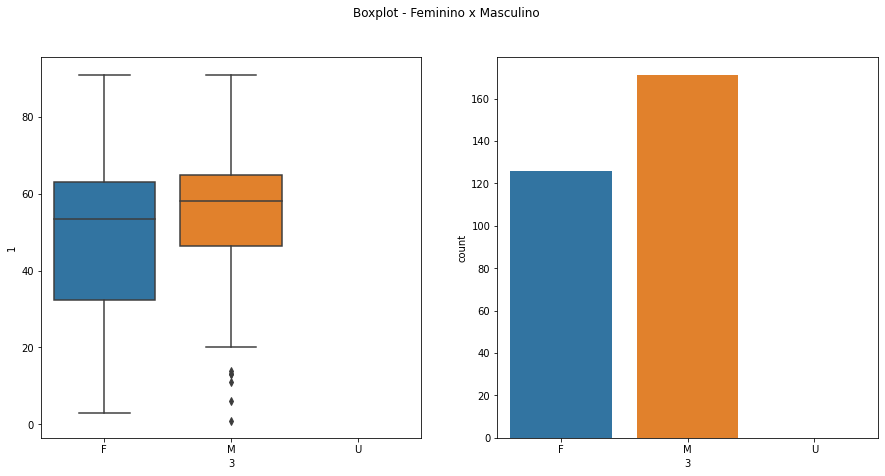

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.suptitle("Boxplot - Feminino x Masculino")
sns.boxplot(x=3, y=1, data=primeira_ocorrencia_pacientes,  ax=ax[0])
sns.countplot(x=3, data=primeira_ocorrencia_pacientes,  ax=ax[1])
#ax.set_xlabel('X-label', fontsize=8)
#ax.set_ylabel('Y-label', fontsize=8)

plt.show()

### 7.2.4 Número de internações

Para uma melhor visualização das diferentes internações para cada paciente, pode-se observar os gráficos abaixo.

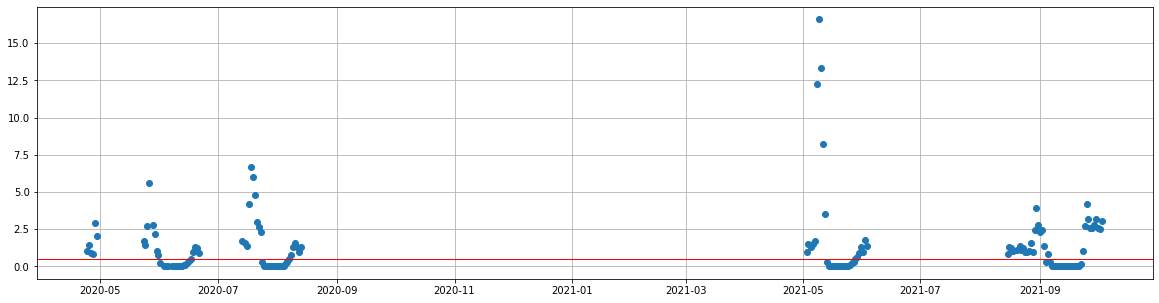

In [ ]:
df_interesse = frame[(frame[2] == idx)]
df_interesse_internacoes = df_interesse[df_interesse[4] == 'NEUTRÓFILOS ABSOLUTO']
df_interesse_internacoes = df_interesse_internacoes.sort_values(by=[0], axis=0)
plt.figure(figsize=(20,5))
plt.plot_date(df_interesse_internacoes[0], df_interesse_internacoes[5])
plt.axhline(y=0.5, color='r', linestyle='-', linewidth=1)
plt.grid()
plt.show()

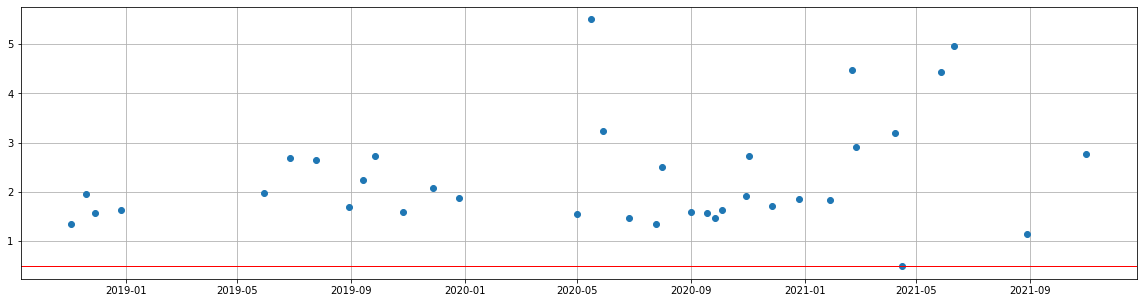

In [ ]:
df_interesse = frame[(frame[2] == max_qtd_inter_idx)]
df_interesse_internacoes = df_interesse[df_interesse[4] == 'NEUTRÓFILOS ABSOLUTO']
df_interesse_internacoes = df_interesse_internacoes.sort_values(by=[0], axis=0)
plt.figure(figsize=(20,5))
plt.plot_date(df_interesse_internacoes[0], df_interesse_internacoes[5])
plt.axhline(y=0.5, color='r', linestyle='-', linewidth=1)
plt.grid()
plt.show()

# **8. Resultados e Discussões**

Os dados foram analisados a partir de estatísticas descritivas e de visualizações gráficas, tendo como foco uma melhor compreensão da amostra de interesse deste trabalho.

O número de pacientes com Neutropenia Febril (número absoluto de neutrófilos abaixo de 500 por mm³ de sangue) encontrados foi de $297$.

Os outros resultados e discussões serão separados por parâmetro analisado.

## 8.1 Idade

A média de idade de pacientes com neutropenia febril foi de $52.4$ anos, a mediana foi de $56$ anos e a moda foi de $61$ anos. Antes de analisar estes dados, pode ser que os profissionais da saúde estivessem mais preocupados com esta condição em pessoas idosas, já que estes são mais sensíveis, porém, com estes dados é possível compreender que a faixa etária mais afetada na verdade está entre 53 e 60 anos aproximadamente.

Além disso, ao analisar o histograma de idade, não há uma distribuição gaussiana. Em futuras análises, esta informação é relevante, para que não sejam aplicadas técnicas inadequadas neste conjunto de dados.

## 8.2 Sexo

O percentual de pacientes do sexo masculino afetados pela condição da neutropenia febril é maior que o percentual do sexo feminino. Com os resultados deste estudo não é possivel tirar grandes conclusões sobre isso, mas é possível levantar algumas hipóteses para estudos futuros. Entre elas:

> O organismo masculino possui maior propensão à condição da Neutropenia Febril? Se sim, qual é a causa?

> Sabe-se que as mulheres são mais preocupadas com a saúde, e por isso procuram tratamento antes. Pode-se afirmar que o tratamento preococe das mulheres diminui a propensão à condição da Neutropenia Febril?

## 8.3 Estratificação por sexo

Ao estratificar a idade por sexo foi possível perceber que a média de idade homens com Neutropenia Febril é maior que a de mulheres. Seguindo a mesma linha do que foi apresentado anteiormente, com os resultados deste estudo não é possivel tirar grandes conclusões, mas pode-se levantar também a hipótese:

> Essa diferença de idade se dá pelo fato de as mulheres procurarem tratamento antes que os homens?

Além disso, ao analisar a distribuição das idades por sexo, é possível perceber que a idade dos homens segue uma distribuição gaussiana, mas a das mulheres não segue. Há dois picos, sendo um em aproximadamente $60$ anos, e outro em aproximadamente $25$ anos. Com a análise feita não é possível chegar em grandes conclusões, mas levantam-se as hipóteses:

> Há algum outro parâmetro influenciando na distribuição por idade das mulheres? 

> Se este parâmetro foi estratificado, será possível visualizar distribuições gaussianas? 

> Há algum erro não identificado pela equipe influênciando nesta distribuição?

## 8.4 Número de internações

Para o caso em particular, utlizamos o valor de 7 dias. Se a diferença do i-ésimo para o (i-1)-ésimo exame de sangue que contém valores para neutrófilos absolutos for maior do que 7, então consideraremos como uma nova internação. Há limitação na medida em que não sabemos se houve algum "apagão de exames" ou outro evento que afetasse a execução destes exames.

O valor eventualmente pode ser alterado para mais ou para menos, de acordo com necessidade/avaliação de quem estiver analisando.

Cabe lembrar uma das limitações desta decisão: o paciente com maior número do que identificamos como internação (exames de sangue com dados de neutrófilos com diferença maior que 7 dias) parece que tem um comportamento de execução de exames de rotina, pois quando plotado, há um espaçamento quase que uniforme entre os exames.



# **9. Conclusão**

Neste projeto, o objetivo foi responder a pergunta de pesquisa apresentada pelo Prof. Dr. Erich Vinicius de Paula, Coordenador Geral do Hemocentro da Unicamp, baseado em dados laboratoriais do Hospital das Clínicas da Unicamp.

Adotou-se o modelo de referência CRISP-DM, que é composto de 6 fases: (i)entendimento do negócio/contexto, (ii) entendimento dos dados, (iii) preparação dos dados, (iv) modelagem, (v) avaliação e (vi) resultados. 

Para compreender o negócio, foi estudado um pouco sobre a Leucemia, que é um tipo de câncer hematológico, cujo tratamento envolve a quimioterapia. Este processo causa muitas complicações ao paciente, entre elas a Neutropenia Febril, que pode ser identificada pelo número absoluto de neutrófilos abaixo de 500 por mm³ de sangue.

A fim de fazer com que o paciente tenha a melhor recuperação possível, estudos são feitos no Hemocentro da Unicamp, baseados nos resultados dos exames laboratórias que os pacientes fazem no Hospital das Clínicas da Unicamp. É nesse contexto que surge a pergunta de perquisa: 

> Quantos são os pacientes do Hemocentro e que também fizeram exame laboratorial no Hospital das Clínicas, que possuem quantidade de neutrófilos inferior a 500. Informar também qual foi a primeira data onde esta observação ocorreu para cada um dos pacientes.

A coleta dos dados aconteceu anteriormente, sem a participação da equipe, que apenas recebeu os dados em 12 arquivos do tipo ".csv" e em 1 arquivo do tipo ".xls". Os diretório foram importados a este *notebook*, e os dados foram filtrados, eliminando linhas duplicadas e valores vazios que atrapalhavam a análise. Foi feita a comparação dos identificadores da lista do hemocentro, e da lista do HC, chegando em $297$ pacientes do Hemocentro com Neutropenia Febril, ou seja, com número absoluto de neutrófilos abaixo de 500 por mm³ de sangue. Foi gerado um arquivo do tipo ".csv" com a data da primeira ocorrência desta condição para cada um dos pacientes.

Além disso, foram realisadas analises quanto à idade, sexo e data de ocorrência, onde foi possível identificar que: (i) a média de idade de pacientes com neutropenia febril foi de  52.4  anos, a mediana foi de  56  anos e a moda foi de  61  anos, (ii) há mais homens do que mulheres com esta condição, (iii) os homens que sofrem desta condição são, em média, mais velhos do que as mulheres, (iv) a distribuição de idade das mulheres não é do tipo gaussiana.

Foram identificados erros na base de dados fornecidas, e o grande desafio da equipe foi identificar quais destes erros interfeririam na análise e deveriam serem eliminados da base e quais deveriam ficar. Também foi desafiador identificar o que realmente era erro e o que era uma condição incomum, porém real.

Com as análises, várias outras hipóteses foram levantadas, e se confirmadas, podem auxiliar na melhor recuperação dos pacientes, por isso, elas ficam como proposta de trabalhos futuros.

Por fim conclui-se que com este trabalho a equipe pôde lidar com um cenário real de análise de dados, enfrentando desafios reais, e buscando formas de contorná-los sem afetar os resultados. Foi possível também conhecer ferramentas e metodologias para esta análise, e foi um grande motivador saber que este resultado realmente pode contribuir para a melhora da recuperação destes pacientes.


# **Referências**

```{bibliography}

[1] P. Chapman et al., "CRISP-DM 1.0 - Step-by-step data mining guide". SPSS Inc., 2000.

[2] INCA - Instituto Nacional de Câncer. (2021). "Tipos de Câncer [Online]". Disponível em: https://www.inca.gov.br/tipos-de-cancer. 

[3] INCA - Instituto Nacional de Câncer. (2021). "Leucemia [Online]". Disponível em: https://www.inca.gov.br/tipos-de-cancer/leucemia. 

[4] INCA - Instituto Nacional de Câncer. (2021). "Estatísticas de câncer [Online]". Disponível em: https://www.inca.gov.br/numeros-de-cancer. 

[5] Unicamp. (2022). "Conheça o hemocentro da Unicamp [Online]". Disponível em: https://www.hemocentro.unicamp.br/conheca-o-hemocentro/.

[6] Agência O Globo. (2022). "Mulher mais velha do Brasil morre aos 116 anos [Online]". Disponível em: https://exame.com/brasil/mulher-mais-velha-do-brasil-morre-aos-116-anos/.

```

